In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
sns.set(style="whitegrid")
sns.set_palette("Set2")

In [34]:
df = pd.read_csv("test-exponential.csv", index_col=0)
df

,N,dist1,dist2,dist3,dist4,dist5,lik1,lik2,lik3,lik4,lik5,likBase
1,10,0.160694,-0.016877,0.142937,0.124432,0.084433,5.465234,7.387158,5.674924,5.888861,6.336237,6.932419
2,1000,0.000492,0.000331,0.000492,0.000477,0.000471,1058.434715,1058.596063,1058.435200,1058.449763,1058.455505,1060.197811
3,10,0.069699,0.018299,0.064559,0.059203,0.047624,11.020468,11.558726,11.075616,11.132765,11.255192,11.337369
4,1000,0.000657,0.000433,0.000656,0.000636,0.000628,1007.229606,1007.453897,1007.230278,1007.250524,1007.258506,1007.284913
5,10,0.089232,-0.012157,0.079094,0.068528,0.045689,4.595846,5.653088,4.706744,4.821017,5.063655,6.104039
...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1000,0.003136,0.002106,0.003133,0.003040,0.003003,996.247300,997.279265,996.250397,996.343583,996.380319,996.386862
1997,10,0.170249,-0.008373,0.152387,0.133773,0.093536,7.238873,9.190902,7.452140,7.669649,8.124249,8.289669
1998,1000,0.000034,0.000019,0.000034,0.000033,0.000032,952.220657,952.235522,952.220702,952.222044,952.222573,953.345952
1999,10,0.036724,-0.008382,0.032214,0.027513,0.017352,9.095130,9.553254,9.141898,9.190404,9.294456,9.318771


In [35]:
group = df.groupby("N")
print(group.std())
group.mean()

         dist1     dist2     dist3     dist4     dist5       lik1       lik2  \
N                                                                              
10    0.096480  0.041688  0.089972  0.083297  0.069388   3.379006   3.225650   
1000  0.001029  0.000687  0.001028  0.000997  0.000985  31.867057  31.851191   

           lik3       lik4       lik5    likBase  
N                                                 
10     3.349614   3.323028   3.278128   2.949290  
1000  31.867004  31.865420  31.864804  31.832056  


,dist1,dist2,dist3,dist4,dist5,lik1,lik2,lik3,lik4,lik5,likBase
N,,,,,,,,,,,
10,0.101498,0.015580,0.092906,0.083952,0.064599,8.294368,9.265213,8.399779,8.507386,8.732746,9.277406
1000,0.001021,0.000677,0.001020,0.000989,0.000977,998.410657,998.754906,998.411690,998.442771,998.455024,998.962662


In [65]:
means = group.mean()
means
estims = {};

for i in range(1, 6):
    estims["estim" + str(i)] = [ i for i in means["dist" + str(i)] ] + [ i for i in means["lik" + str(i)] ]

estimDf = pd.DataFrame(estims).transpose()
estimDf.columns = [ "dist-10", "dist-1000", "lik-10", "lik-1000" ]
estimDf["estim"] = estimDf.index
estimDf

,dist-10,dist-1000,lik-10,lik-1000,estim
estim1,0.101498,0.001021,8.294368,998.410657,estim1
estim2,0.015580,0.000677,9.265213,998.754906,estim2
estim3,0.092906,0.001020,8.399779,998.411690,estim3
estim4,0.083952,0.000989,8.507386,998.442771,estim4
estim5,0.064599,0.000977,8.732746,998.455024,estim5


In [66]:
std = group.std()
std
estimsStd = {};

for i in range(1, 6):
    estimsStd["estim" + str(i)] = [ i for i in std["dist" + str(i)] ] + [ i for i in std["lik" + str(i)] ]

stdDf = pd.DataFrame(estimsStd).transpose()
stdDf.columns = [ "dist-10", "dist-1000", "lik-10", "lik-1000" ]
stdDf

,dist-10,dist-1000,lik-10,lik-1000
estim1,0.096480,0.001029,3.379006,31.867057
estim2,0.041688,0.000687,3.225650,31.851191
estim3,0.089972,0.001028,3.349614,31.867004
estim4,0.083297,0.000997,3.323028,31.865420
estim5,0.069388,0.000985,3.278128,31.864804


[Text(1, 0, '0.0'),
 Text(1, 0, '200.0'),
 Text(1, 0, '400.0'),
 Text(1, 0, '600.0'),
 Text(1, 0, '800.0'),
 Text(1, 0, '1000.0'),
 Text(1, 0, '1200.0')]

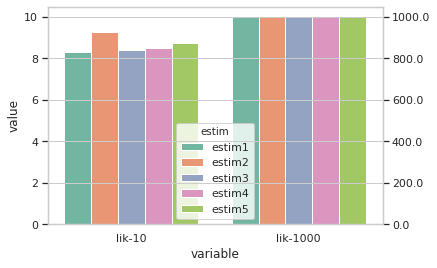

In [92]:
fig, ax1 = plt.subplots()

temp = estimDf.drop(columns=["dist-10", "dist-1000"])

scale = 0.01;
temp["lik-1000"] = scale * temp["lik-1000"]

melted = temp.melt("estim")
melted

ax2 = ax1.twinx()
sns.barplot(x='variable', y='value', hue='estim', data=melted, ax=ax1)

ax2.set_ylim(ax1.get_ylim())
ax2.set_yticklabels(ax1.get_yticks() / scale)